In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
cendata = pd.read_csv("census_income.csv")

cendata.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
cendata.shape

(32560, 15)

In [4]:
pd.set_option('display.max_rows',None)

Checking if the data containing nan values or missing values.

In [5]:
cendata.isnull().values.any()

False

Performing Data Cleaning as our data contains some values like ? in our dataset.

In [6]:
cendata = cendata.replace(' ?',np.nan)

In [7]:
cendata.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
cendata.mode()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,36.0,Private,123011,HS-grad,9.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
1,NaN,NaN,164190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,203488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
cendata["Workclass"] = cendata["Workclass"].fillna("Private")
cendata["Occupation"] = cendata["Occupation"].fillna("Prof-speciality")
cendata["Native_country"] = cendata["Native_country"].fillna("United-States")

In [10]:
cendata.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

We have replaced ? with nan at first and then with the modes of the respective columns.

In [11]:
cendata.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Now we will visualize the data. First we will seperate the categorical and numerical data.

In [12]:
catdata = cendata.select_dtypes(include = ["object"]).keys()
catdata

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

In [13]:
numdata = cendata.select_dtypes(include = ["int64"]).keys()
numdata

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')

In [14]:
cendata[numdata].describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Now we will plot graph for categorical data.

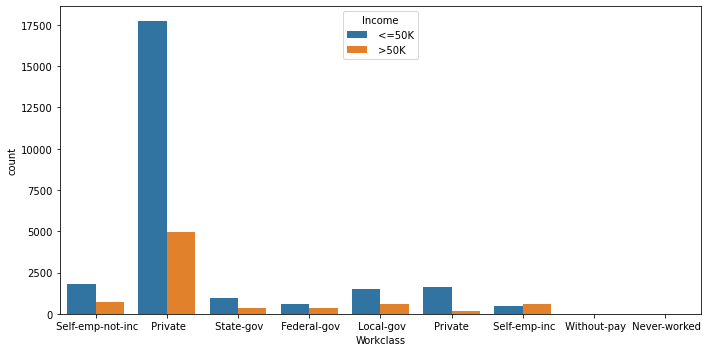

In [15]:
fig = plt.figure(figsize = (10,5))
sns.countplot("Workclass", hue = "Income", data = cendata)
plt.tight_layout()
plt.show()

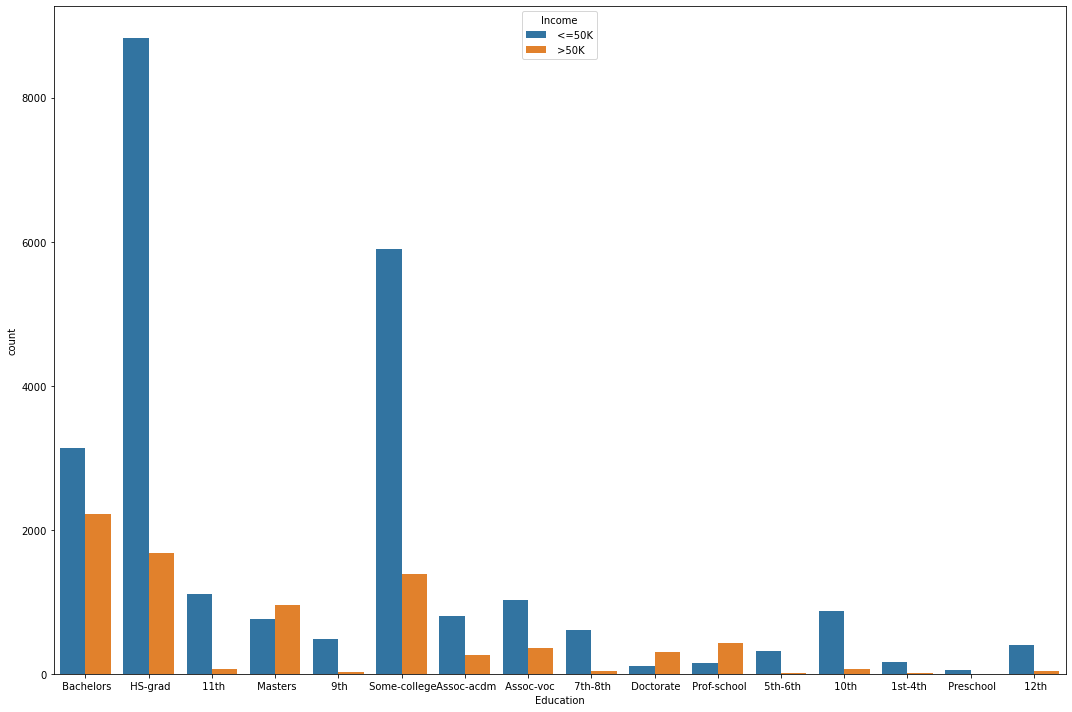

In [16]:
fig = plt.figure(figsize = (15,10))
sns.countplot("Education", hue = "Income", data = cendata)
plt.tight_layout()
plt.show()

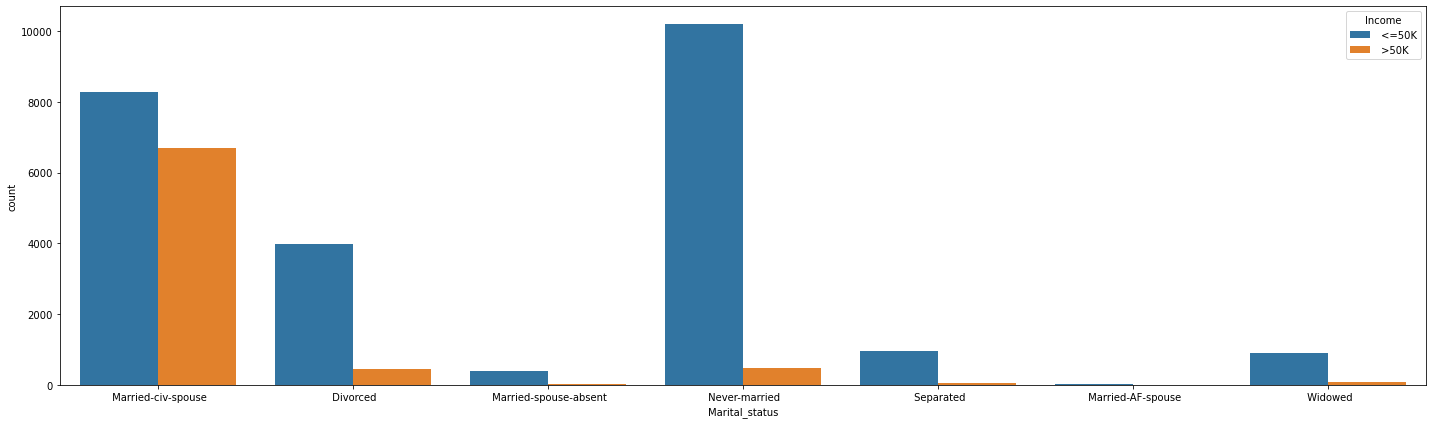

In [17]:
fig = plt.figure(figsize = (20,6))
sns.countplot("Marital_status", hue = "Income", data = cendata)
plt.tight_layout()
plt.show()

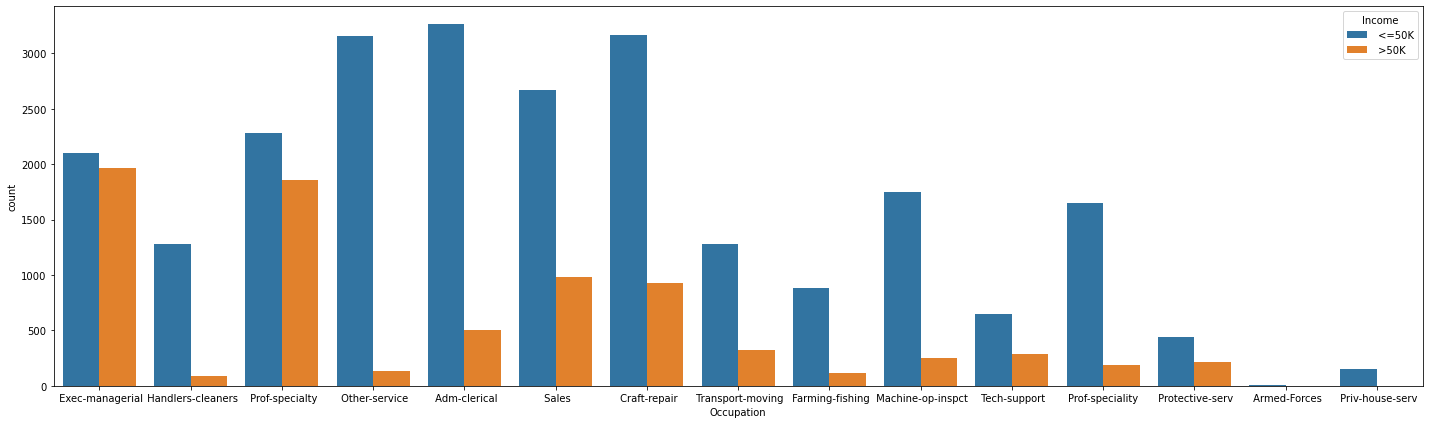

In [18]:
fig = plt.figure(figsize = (20,6))
sns.countplot("Occupation", hue = "Income", data = cendata)
plt.tight_layout()
plt.show()

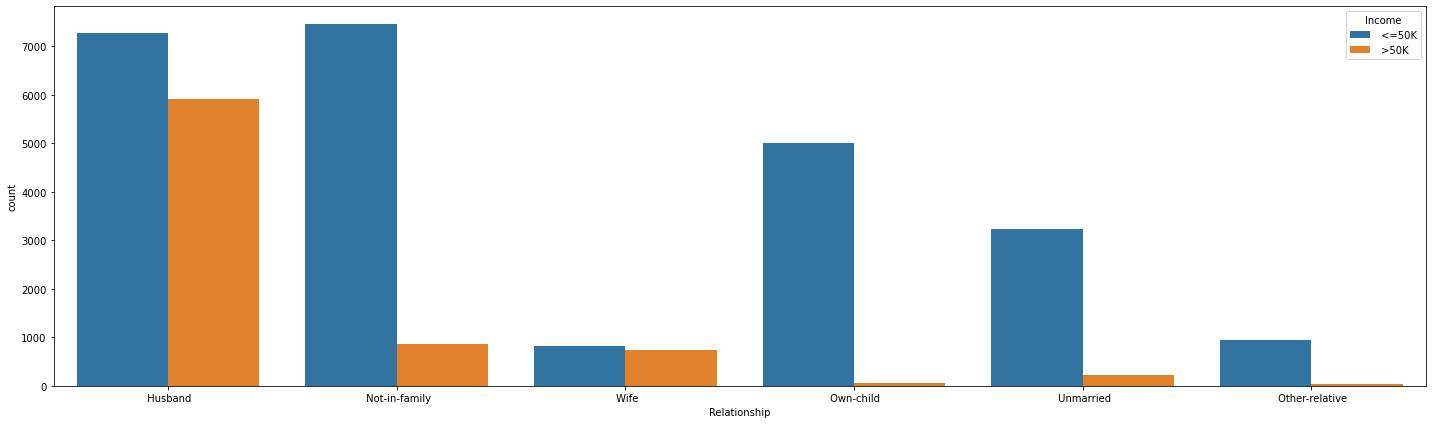

In [19]:
fig = plt.figure(figsize = (20,6))
sns.countplot("Relationship", hue = "Income", data = cendata)
plt.tight_layout()
plt.show()

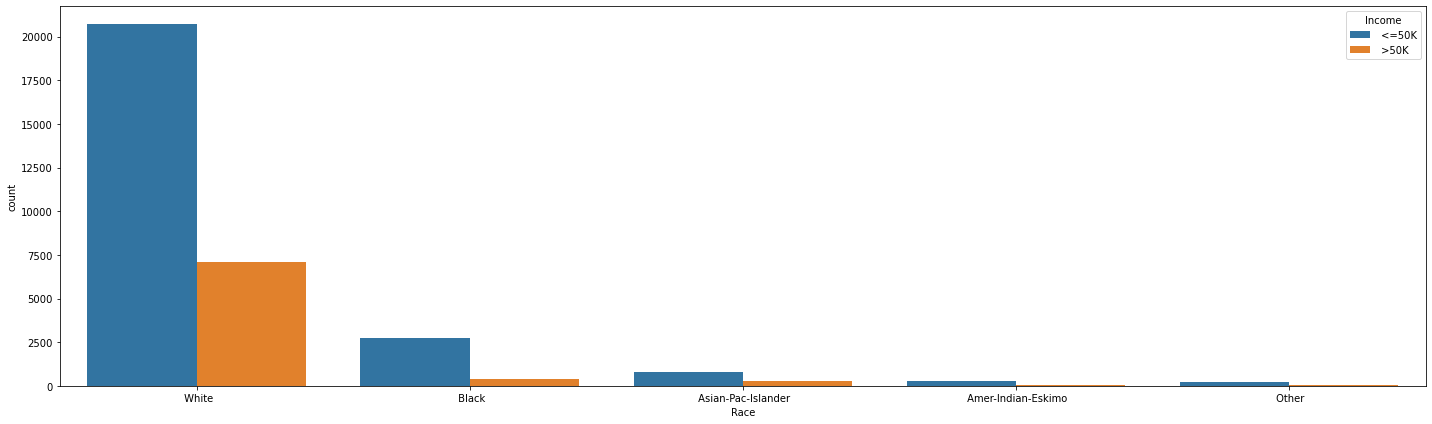

In [20]:
fig = plt.figure(figsize = (20,6))
sns.countplot("Race", hue = "Income", data = cendata)
plt.tight_layout()
plt.show()

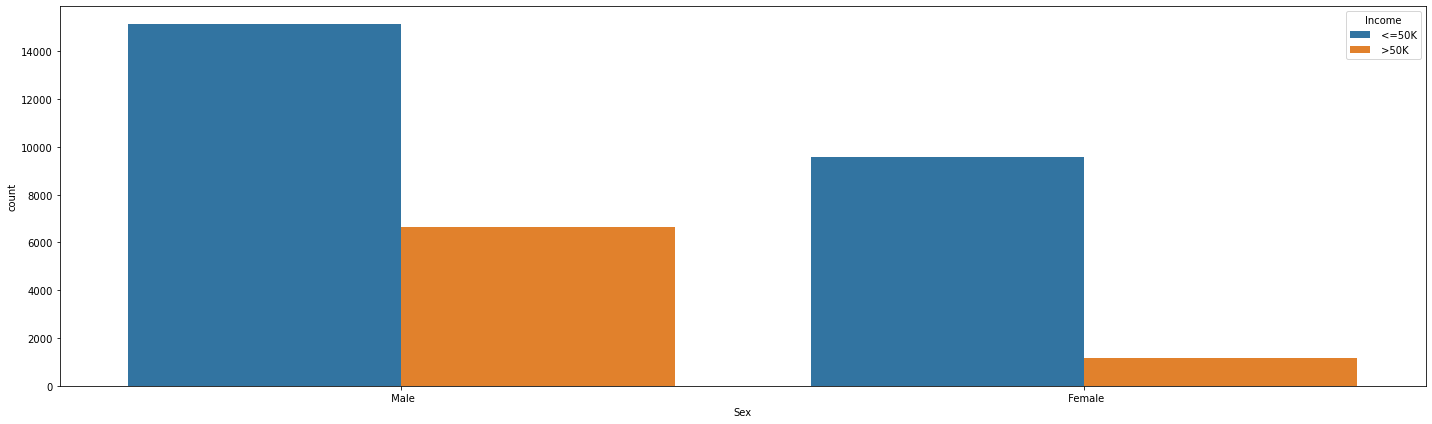

In [21]:
fig = plt.figure(figsize = (20,6))
sns.countplot("Sex", hue = "Income", data = cendata)
plt.tight_layout()
plt.show()

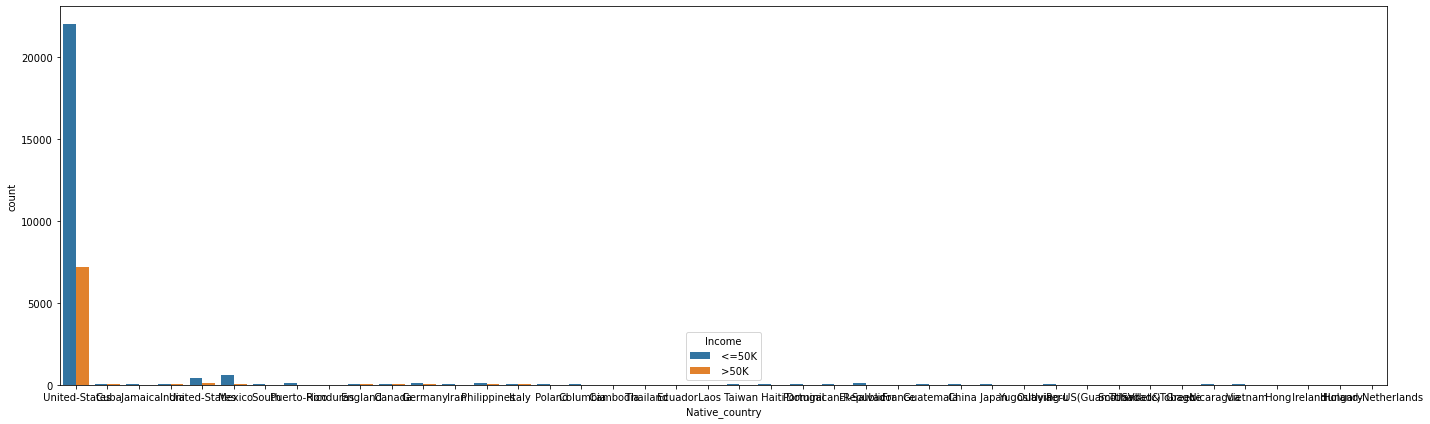

In [22]:
fig = plt.figure(figsize = (20,6))
sns.countplot("Native_country", hue = "Income", data = cendata)
plt.tight_layout()
plt.show()

As from above we can see that we have two category in sex so we will convert that in numeric data i.e in 0 and 1.

In [23]:
cendata.head(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [24]:
cendata["Income"] = cendata["Income"].apply(lambda x: 1 if x ==' >50K' else 0)

In [25]:
cendata.head(30)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,1


In [26]:
cendata["Sex"] = cendata["Sex"].apply(lambda x: 1 if x == " Male" else 0)

In [27]:
cendata.head(30)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,0,0,0,40,United-States,0
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,0,0,0,16,Jamaica,0
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,45,United-States,1
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,0,14084,0,50,United-States,1
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,5178,0,40,United-States,1
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,1,0,0,80,United-States,1


Above we converted the sex and income in numerical data.
Now we will find the outliers and try to remove.

<AxesSubplot:xlabel='Income', ylabel='Hours_per_week'>

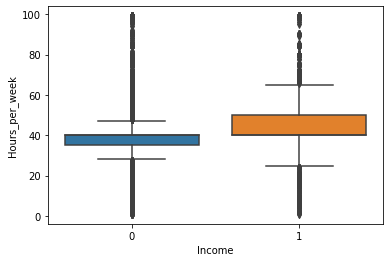

In [28]:
sns.boxplot(y = "Hours_per_week" , x = "Income", data = cendata)

<AxesSubplot:xlabel='Income', ylabel='Age'>

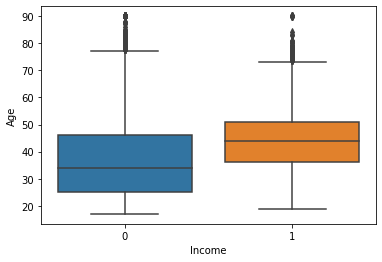

In [29]:
sns.boxplot(y = "Age" , x = "Income", data = cendata)

<AxesSubplot:xlabel='Income', ylabel='Education_num'>

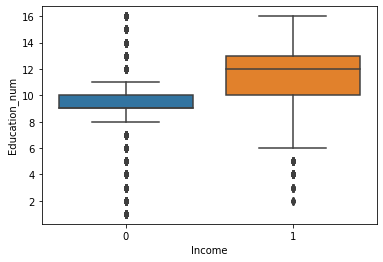

In [30]:
sns.boxplot(y = "Education_num" , x = "Income" , data = cendata)

<AxesSubplot:xlabel='Income', ylabel='Fnlwgt'>

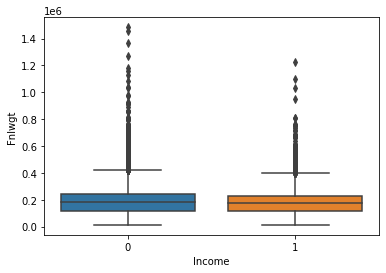

In [31]:
sns.boxplot(y = "Fnlwgt" , x = "Income" , data = cendata)

<AxesSubplot:xlabel='Income', ylabel='Capital_gain'>

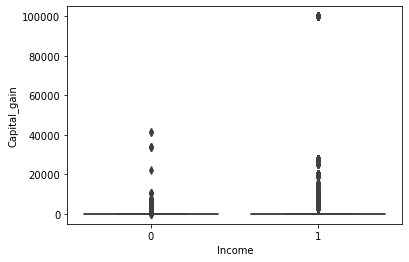

In [32]:
sns.boxplot(y = "Capital_gain" , x = "Income" , data = cendata)

<AxesSubplot:xlabel='Income', ylabel='Capital_loss'>

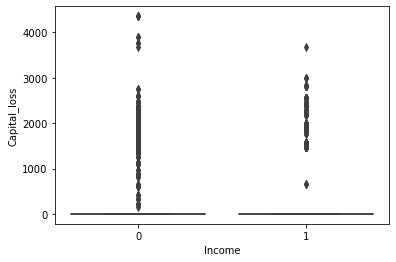

In [33]:
sns.boxplot(y = "Capital_loss" , x = "Income" , data = cendata)

<AxesSubplot:xlabel='Income', ylabel='Sex'>

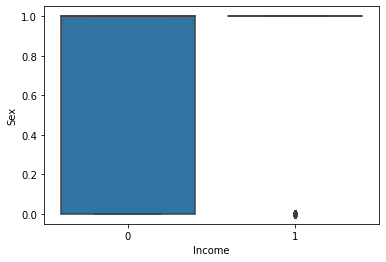

In [34]:
sns.boxplot(y = "Sex" , x = "Income" , data = cendata)

<AxesSubplot:xlabel='Relationship', ylabel='Income'>

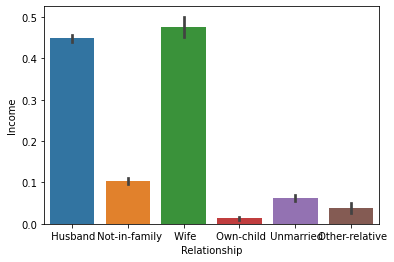

In [35]:
sns.barplot(y = "Income" , x = "Relationship" , data = cendata)

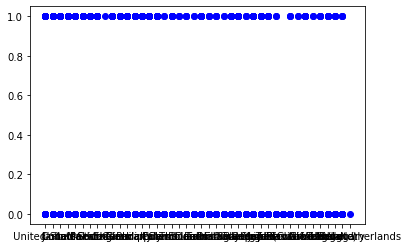

In [36]:
plt.scatter(cendata["Native_country"],cendata["Income"],c = "b")

<AxesSubplot:xlabel='Race', ylabel='Income'>

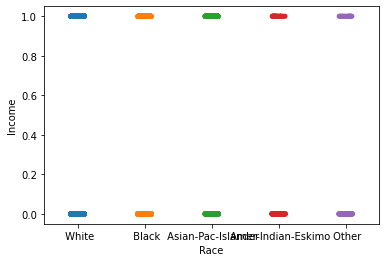

In [37]:
sns.stripplot(y="Income" , x = "Race", data = cendata)

In [38]:
dummy = pd.get_dummies(cendata, columns = ["Workclass","Education", "Marital_status","Occupation"])

After doing EDA we found that there are some columns that are not useful so we have to drop it.

Now as we converted the categorical data into numerical we will find the correlation between features.

In [39]:
dummy = dummy.drop(columns = ["Relationship", "Race", "Native_country"])

<AxesSubplot:>

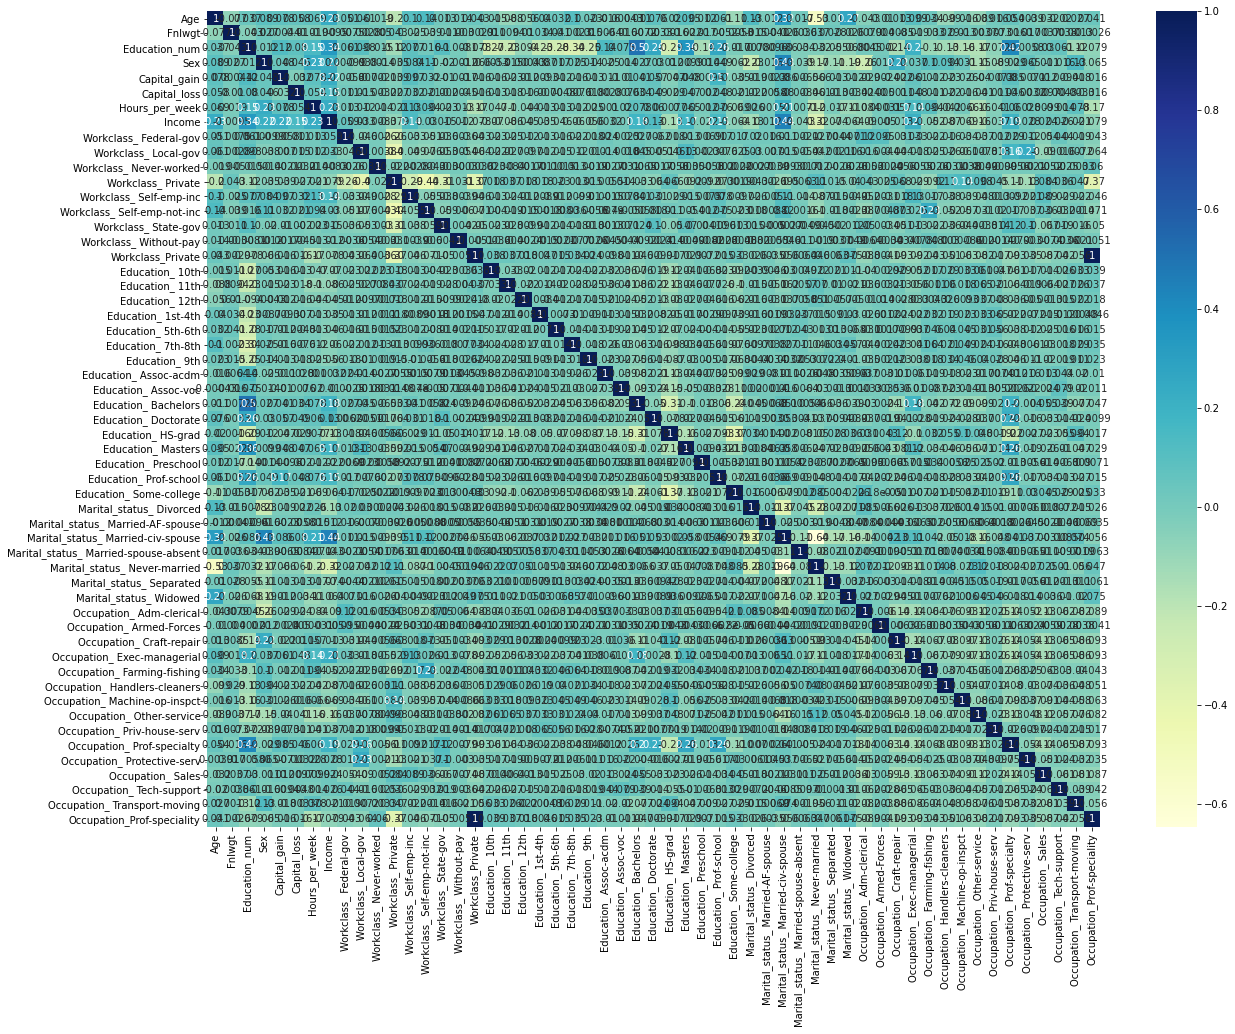

In [40]:
corr = dummy.corr()
plt.figure(figsize = (20,15))
sns.heatmap(corr, cmap = "YlGnBu", annot = True)

In [41]:
x = dummy.drop(['Income'],axis = 1)
y = dummy["Income"]

In [42]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(0.005)
x = selector.fit_transform(x)
x.shape,y.shape

((32560, 48), (32560,))

In [43]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(x)

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)

In [45]:
priComponents = pca.fit_transform(x_std)

In [46]:
priDf = pd.DataFrame(data = priComponents)

In [47]:
priDf.head(20)

,0,1,2,3,4,5,6,7,8,9
0,2.722657,0.044225,0.855300,-0.144380,-0.356804,-1.744200,1.266406,0.153271,0.939329,-2.133276
1,-1.267856,0.988349,-0.723187,0.757636,-0.371882,0.355421,-0.780854,-0.549428,-0.657468,0.705293
2,-0.952677,1.980168,-0.059062,-1.010535,0.376998,2.049683,0.873236,1.285260,0.239376,-1.077679
3,1.604034,-1.455875,-1.169406,-0.658092,-0.719748,1.070581,-0.063702,0.379670,0.061178,-0.299787
4,1.932051,-0.896000,-0.812805,0.118122,-1.322005,0.515203,-0.528047,0.592930,0.904839,-1.520775
5,-3.054461,0.655606,0.429391,1.909973,-0.163026,3.153671,1.372365,1.312634,0.871611,-0.082911
6,1.807731,2.074322,1.177975,0.550213,0.405777,-1.609437,0.490502,-1.297701,0.706808,-1.160434
7,1.425944,-2.871823,-1.443758,-0.492940,0.109060,2.181930,0.449500,-1.054645,0.221773,-0.191438
8,2.165478,0.079888,-0.845960,-0.863475,-1.914673,-0.606825,-0.099873,1.149183,1.048170,-0.912920
9,1.415989,1.190647,-0.810021,-0.947735,-0.723049,-1.605453,-0.149729,1.415450,-0.345021,0.527713


In [48]:
from sklearn.model_selection import train_test_split
priDf_train,priDf_test,y_train,y_test = train_test_split(priDf,y,test_size=0.2)

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(priDf_train,y_train)

LogisticRegression()

In [50]:
pred = model.predict(priDf_test)
from sklearn import metrics
pca_acc = metrics.accuracy_score(y_test,pred)*100 
pca_acc

83.06203931203932

In [51]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 5)
lr.fit(priDf_train,y_train)

LogisticRegression(random_state=5)

In [52]:
pred_lr = lr.predict(priDf_test)
lr_acc = metrics.accuracy_score(y_test,pred_lr)*100
lr_acc

83.06203931203932

In [53]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(priDf_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [54]:
pred_knn = knn.predict(priDf_test)
knn_acc = metrics.accuracy_score(y_test,pred_knn)*100
knn_acc

83.47665847665847

In [55]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(priDf_train,y_train)

GaussianNB()

In [56]:
pred_gnb = gnb.predict(priDf_test)
gnb_acc = metrics.accuracy_score(y_test,pred_gnb)*100
gnb_acc

81.31142506142506

In [57]:
#SVM
from sklearn.svm import SVC
svc = SVC()
svc.fit(priDf_train,y_train)

SVC()

In [58]:
pred_svc = svc.predict(priDf_test)
svc_acc = metrics.accuracy_score(y_test,pred_svc)*100
svc_acc

83.32309582309583

In [59]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dt = DecisionTreeClassifier()
dt.fit(priDf_train,y_train)

DecisionTreeClassifier()

In [60]:
pred_dt = dt.predict(priDf_test)
dt_acc = metrics.accuracy_score(y_test,pred_dt)*100
dt_acc

78.1480343980344

In [61]:
#Random Forest
rnd = RandomForestClassifier(max_leaf_nodes=14)
rnd.fit(priDf_train,y_train)
pred_rnd = rnd.predict(priDf_test)
rnd_acc = metrics.accuracy_score(y_test,pred_rnd)*100
rnd_acc

82.73955773955774

As we get to know the accuracies of all the model we will plot to compare and then apply grid cv to get the best params.

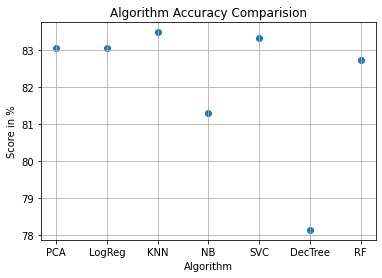

In [62]:
accuracy_Score = [pca_acc,lr_acc,knn_acc,gnb_acc,svc_acc,dt_acc,rnd_acc]
algoName = ["PCA","LogReg","KNN","NB","SVC","DecTree","RF"]

plt.scatter(algoName, accuracy_Score)
plt.grid()
plt.title("Algorithm Accuracy Comparision")
plt.xlabel("Algorithm")
plt.ylabel("Score in %")
plt.show()

So from the ablove plot e can say that the best model is SVC with the highest accuracy.

In [63]:
from sklearn.model_selection import GridSearchCV
  
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
grid.fit(priDf_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.799, total=  18.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.804, total=  17.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   35.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.801, total=  21.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.800, total=  21.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.808, total=  17.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.826, total=   8.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.835, total=   8.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.833, total=   8.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.830, total=   8.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 55.8min finished


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


Saving the model:-

In [64]:
import joblib

joblib.dump(grid,"Census")

['Census']